Dataset says we need to Classify the animal type as 1,2,3,4,5,6,7 which means it's case of multiclassification. As we know that the KNN algorithm is designed for multiclassification which is used to classify the data, therefore, in this dataset, we can use KNN algorithm. 

# 1. Analyse the data using the visualizations

# 2. Preprocess the data by handling missing values & Outliers, if any.


In [1]:
import warnings
warnings.filterwarnings('ignore')  # use to avoid warning in the code

In [2]:
import pandas as pd # import pandas lib using it's short form 

In [3]:
data = pd.read_csv(r'Zoo.csv') # read the data

In [4]:
data.head() #display top 5 rows

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
data.info() # gives info about null values and data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
data.isnull().sum()  # null values in each column

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

It means, there is no null value in our dataset

In [7]:
data.dtypes # data type in each column

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [8]:
data.shape  # rows and columns

(101, 18)

In [9]:
data[data.duplicated()]  # display duplicated rows

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


It means, there is no duplicated row in the dataset

# Let's check all the categorical columns in the dataset

In [10]:
data.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [11]:
colname = []                      #blank list
for x in data.columns:           # x can be any column like animal name, hair,.........,type
    if data[x].dtypes=='object': # data type of any column is equal to object means that column is categorical 
        colname.append(x)         # categorical column will add in blank list
colname                            # all the categorical columns saved in var. colname 
    

['animal name']

Since, machine understand only numbers. Therefore, convert categorical column into numerical column which can be done either by dummy variable or Label Encoding

In [12]:
data['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

# Since, there are more no. of unique values, we always prefer Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder # import LabelEncoder function from preprocessing sublibrary
le=LabelEncoder()                              # save LabelEncoder function in a variable le
for x in colname:                             # x means animal name as colname = ['animal name']
    data[x]=le.fit_transform(data[x]) # it assigns numbers to all values of categrorical column but representation is not like a dictionary
    le_name_mapping=dict(zip(le.classes_,le.transform(le.classes_))) #it arranges all values of categorical column in alphabetical order just like a dictionary and then assign numbers to these values as 0,1,2,3...
    print('Feature',x)                      #display the name of categorical column
    print('mapping', le_name_mapping)         # display the numbers assigned to all the values of categorical column

Feature animal name
mapping {'aardvark': 0, 'antelope': 1, 'bass': 2, 'bear': 3, 'boar': 4, 'buffalo': 5, 'calf': 6, 'carp': 7, 'catfish': 8, 'cavy': 9, 'cheetah': 10, 'chicken': 11, 'chub': 12, 'clam': 13, 'crab': 14, 'crayfish': 15, 'crow': 16, 'deer': 17, 'dogfish': 18, 'dolphin': 19, 'dove': 20, 'duck': 21, 'elephant': 22, 'flamingo': 23, 'flea': 24, 'frog': 25, 'fruitbat': 26, 'giraffe': 27, 'girl': 28, 'gnat': 29, 'goat': 30, 'gorilla': 31, 'gull': 32, 'haddock': 33, 'hamster': 34, 'hare': 35, 'hawk': 36, 'herring': 37, 'honeybee': 38, 'housefly': 39, 'kiwi': 40, 'ladybird': 41, 'lark': 42, 'leopard': 43, 'lion': 44, 'lobster': 45, 'lynx': 46, 'mink': 47, 'mole': 48, 'mongoose': 49, 'moth': 50, 'newt': 51, 'octopus': 52, 'opossum': 53, 'oryx': 54, 'ostrich': 55, 'parakeet': 56, 'penguin': 57, 'pheasant': 58, 'pike': 59, 'piranha': 60, 'pitviper': 61, 'platypus': 62, 'polecat': 63, 'pony': 64, 'porpoise': 65, 'puma': 66, 'pussycat': 67, 'raccoon': 68, 'reindeer': 69, 'rhea': 70, '

In [14]:
data.head(20)  # display top 20 rows

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


column animal name is simply showing numerical values in ascending order. So, let's drop this column

In [15]:
data = data.drop(['animal name'], axis=1)  # drop animal name column

In [16]:
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [17]:
data.shape

(101, 17)

# Let's check the outliers

In [18]:
import matplotlib.pyplot as plt

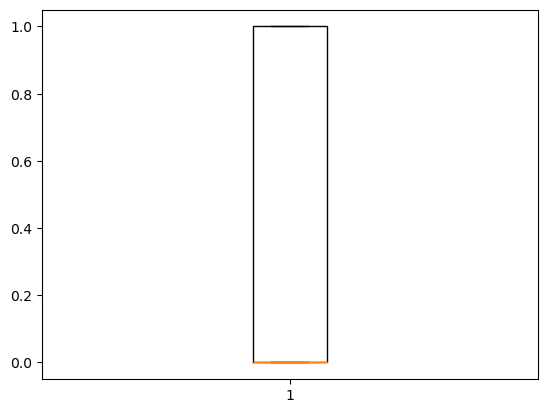

In [19]:
plt.boxplot(data['hair'])  # plot boxplot of hair column
plt.show()

hair: there is no outlier in the dataset which means there is no skewness i.e. data is normally distributed

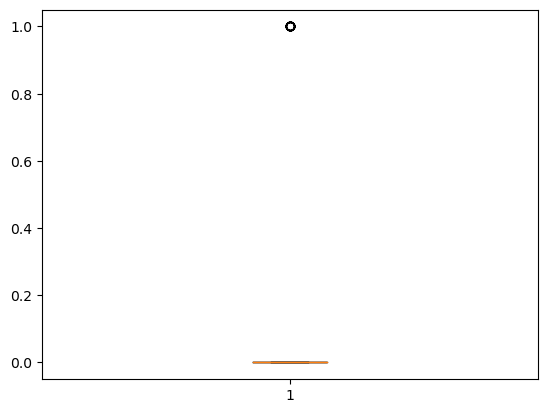

In [20]:
plt.boxplot(data['feathers'])  # plot boxplot of feathers column
plt.show()

feathers: Some animals can have feathers denoted by 1 (they are actually birds) and some animals can't have feathers denoted by 0. Therefore, value at 1.0 can not be considered as outlier. (Normally distributed data)

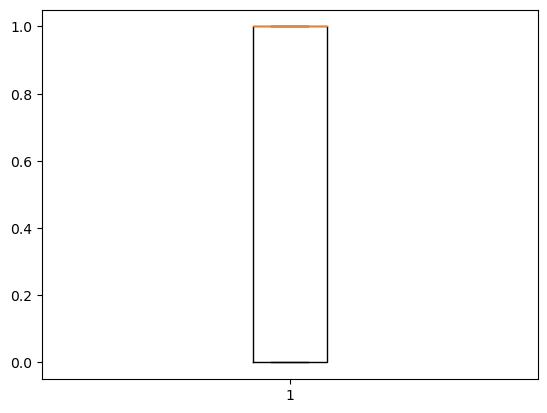

In [21]:
plt.boxplot(data['eggs'])  # plot boxplot of eggs column
plt.show()

eggs: there is no outlier in the data set i.e. data is normally distributed

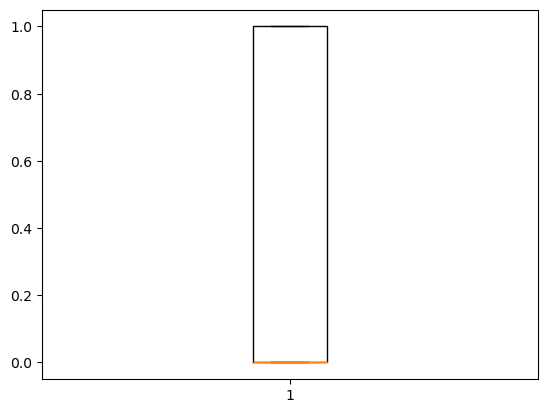

In [22]:
plt.boxplot(data['milk'])  # plot boxplot of milk column
plt.show()

milk: there is no outlier in the data set i.e. data is normally distributed.

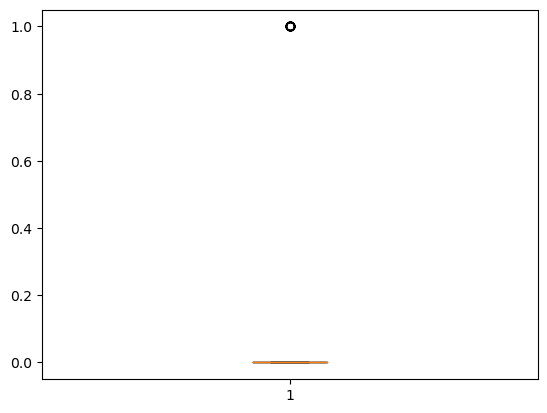

In [23]:
plt.boxplot(data['airborne'])  # plot boxplot of airborne column
plt.show()

airborne: Some animals transported by air (they are actually birds) denoted by 1 and some animals don't transported by air denoted by 0 . Therefore, value at 1.0 can not be considered as outlier. (Normally distributed data)

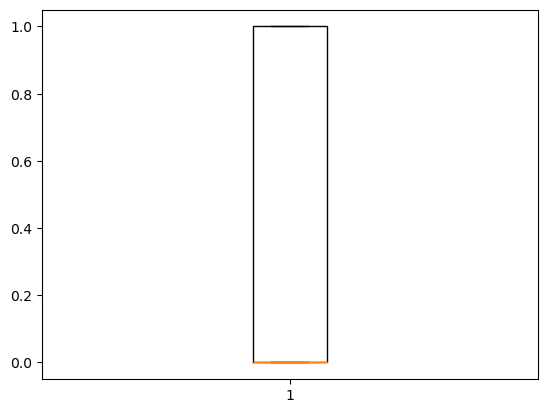

In [24]:
plt.boxplot(data['aquatic'])  # plot boxplot of aquatic column
plt.show()

aquatic: there is no outlier in the data set i.e. data is normally distributed

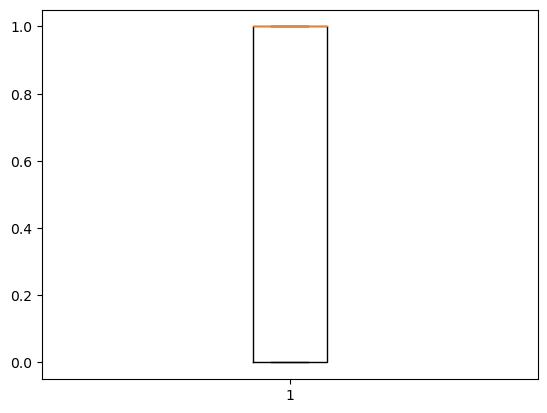

In [25]:
plt.boxplot(data['predator'])  # plot boxplot of predator column
plt.show()

predator: there is no outlier in the dataset which means there is no skewness i.e. data is normally distributed

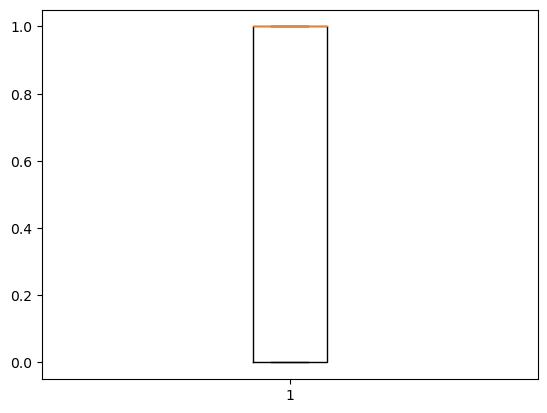

In [26]:
plt.boxplot(data['toothed'])  # plot boxplot of toothed column
plt.show()

toothed: there is no outlier in the dataset which means there is no skewness i.e. data is normally distributed

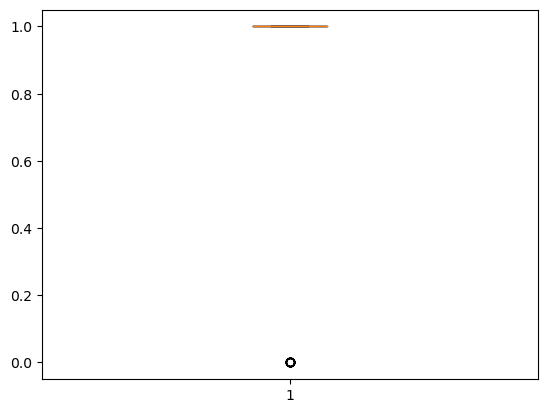

In [27]:
plt.boxplot(data['backbone'])  # plot boxplot of backbone column
plt.show()

backbone: Some animals don't have backbone (they are invertebrates) denoted by 0 and animals with backbone denoted by 1. Therefore, value at 0.0 can not be considered as outlier. (Normally distributed data)

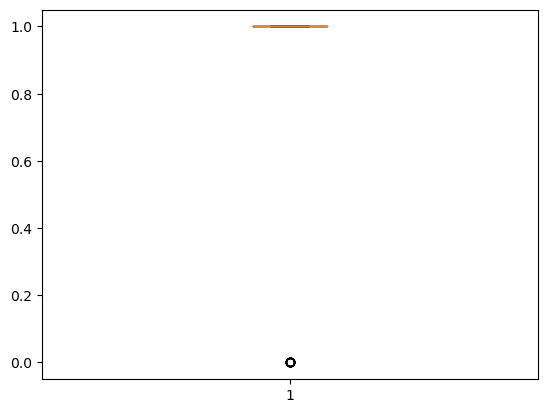

In [28]:
plt.boxplot(data['breathes'])  # plot boxplot of breathes column
plt.show()

breathes: Some animals breathe through gills (they are aquatic) denoted by 0 and some animals breathe through nose denoted by 1. Therefore, value at 0.0 can not be considered as outlier. (Normally distributed data)

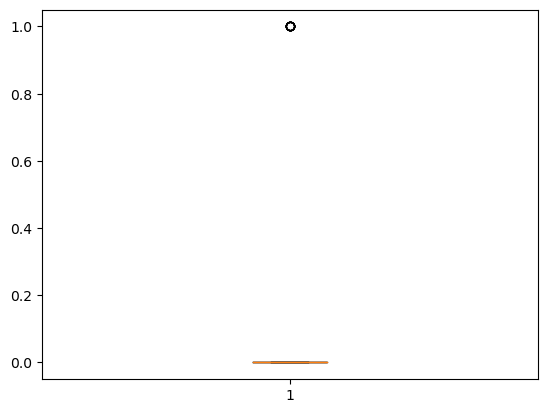

In [29]:
plt.boxplot(data['venomous'])  # plot boxplot of venomous column
plt.show()

venomous: Some animals are venomous denoted by 1 and some animals are not venomous denoted by 0 . Therefore, value at 1.0 can not be considered as outlier. (Normally distributed data)

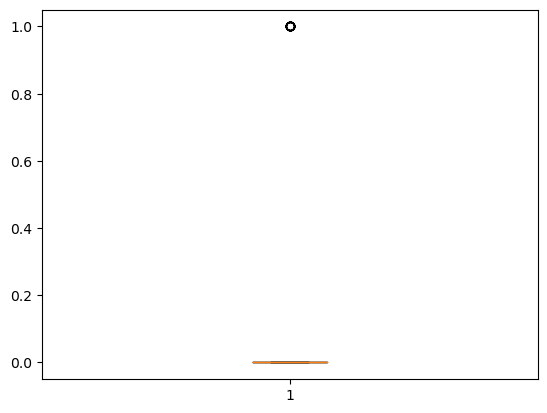

In [30]:
plt.boxplot(data['fins'])  # plot boxplot of fins column
plt.show()

fins: Some animals have fins (they are aquatic) denoted by 1 and some animals don't have fins denoted by 0 . Therefore, value at 1.0 can not be considered as outlier. (Normally distributed data)

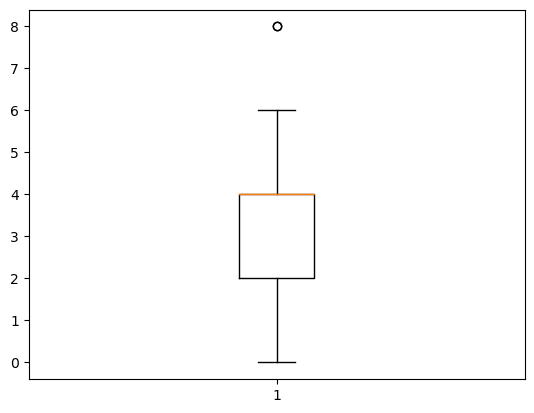

In [31]:
plt.boxplot(data['legs'])  # plot boxplot of legs column
plt.show()

legs: Scorpion has 8 legs. Therefore, data point at 8 can not be considered as outlier. (Normally distributed data)

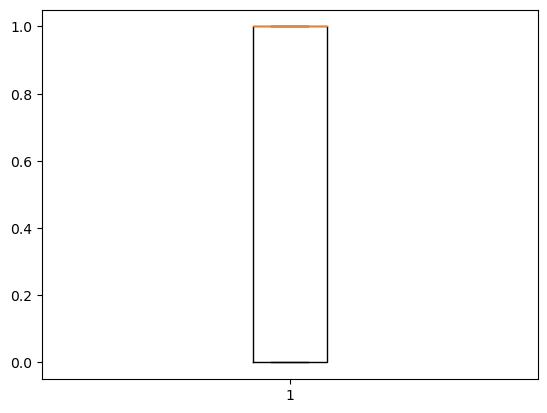

In [32]:
plt.boxplot(data['tail'])  # plot boxplot of tail column
plt.show()

tail: there is no outlier in the dataset which means there is no skewness i.e. data is normally distributed

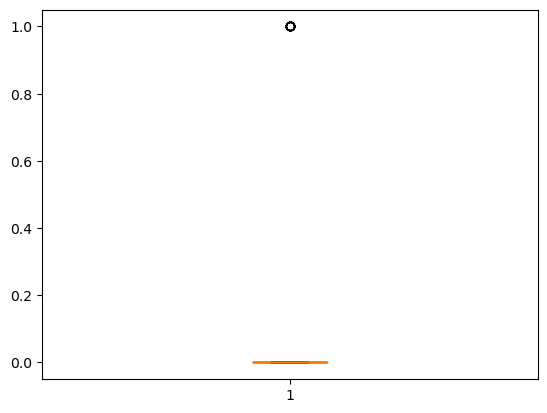

In [33]:
plt.boxplot(data['domestic'])  # plot boxplot of domestic column
plt.show()

domestic: domestic animals are denoted by 1 and non-domestic animals are denoted by 0. Therefore, value at 1.0 can not be considered as outlier. (Normally distributed data)

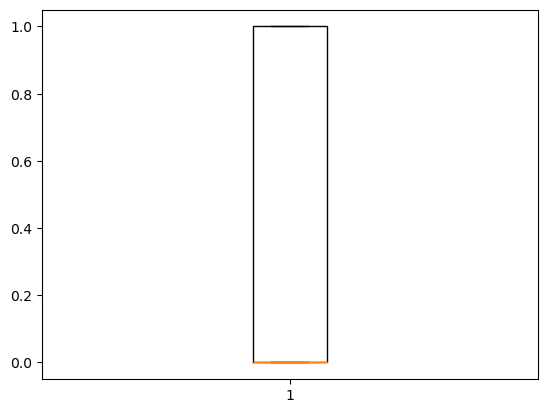

In [34]:
plt.boxplot(data['catsize'])  # plot boxplot of catsize column
plt.show()

catsize:there is no outlier in the dataset which means there is no skewness i.e. data is normally distributed

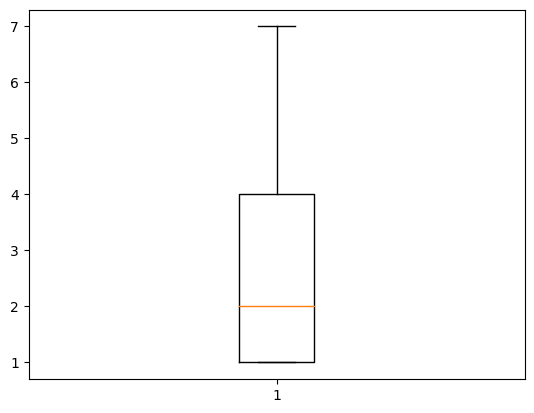

In [35]:
plt.boxplot(data['type'])  # plot boxplot of type column
plt.show()

type:there is no outlier in the dataset which means there is no skewness i.e. data is normally distributed

# 3. Split the dataset into training and testing sets (80% training, 20% testing).

Convert data into X and Y.
In our assignment task, it is given that model has to predict the class of animal type. Therefore, type column will be saved in Y variable and rest columns will be saved in X variable

In [36]:
data.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

In [37]:
X = data.values[:,:16]   # X denotes columns from hair to catsize
Y = data.values[:,-1]    # Y denotes column type

In [38]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [39]:
X.shape

(101, 16)

In [40]:
Y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [41]:
Y.shape

(101,)

# split X and Y into 2 parts to get training and testing data.

80% training, 20% testing => means parameter test_size = 0.2

In [42]:
from sklearn.model_selection import train_test_split # import train_test_split func from model_selection sublib.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10) # training and testing data (model can randomly take 10 rows at a time)

In [43]:
X_train

array([[0, 0, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [44]:
X_test

array([[0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0],
       [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 4, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 5, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 6, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 4, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 6, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 4, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 1, 0,

In [45]:
Y_train

array([3, 2, 7, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 1, 1, 1, 3, 1,
       2, 1, 2, 1, 5, 7, 1, 4, 1, 4, 6, 1, 7, 2, 6, 1, 6, 2, 2, 2, 2, 1,
       4, 1, 1, 2, 1, 1, 4, 4, 6, 3, 5, 7, 1, 7, 4, 6, 1, 2, 7, 2, 3, 1,
       2, 2, 1, 6, 1, 4, 4, 1, 1, 5, 1, 1, 7, 1], dtype=int64)

In [46]:
Y_test

array([2, 1, 7, 6, 4, 1, 1, 1, 3, 7, 2, 4, 1, 6, 4, 1, 5, 2, 1, 4, 7],
      dtype=int64)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(80, 16)
(21, 16)
(80,)
(21,)


# 4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

# 5. Choose an appropriate distance metric and value for K.

KNN algorithm which is saved in a function KNeighborsClassifier has two hyperparameters: no. of nearest neighbors and metric. 

K denotes the no. of nearest neighbors. Suppose we have a dataset having 2 classes (class A and Class B) and  we have a new data point. Assume, this new data point is nearest to 2 data points of class B and 1 data point of class A, then, K will be 3 and this new data point will be considered as the part of class B (majority win concept). 

The nearest points wrt to new data point is decided by euclidean distance => therefore, we will pass metric = 'euclidean' in KNeighborsClassifier function

K ≠ 1 and K ≠ even numbers 

K = 3,5,7,9...... (from industrial point of view, K = 5 )

Mathematically, K = sqrt(length of training data)


In [48]:
import numpy as np

In [49]:
from sklearn.neighbors import KNeighborsClassifier  # import KNeighborsClassifier function from neighbors sublib.
model_KNN = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),metric='euclidean')  # save this function in a variable model_KNN

In [50]:
model_KNN   # KNeighborsClassifier func saved in var. model_KNN

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

K = sqrt (80) = 8.94  and its' integer value is 8 

In [51]:
model_KNN.fit(X_train,Y_train)  # fit function will train the model

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [52]:
Y_pred = model_KNN.predict(X_test) # predict the class of Y for a given testing data 

In [53]:
Y_pred

array([2, 1, 5, 6, 4, 1, 4, 4, 1, 5, 2, 4, 1, 6, 4, 1, 1, 2, 1, 4, 4],
      dtype=int64)

Here, we predict six class of Y for a given testing data. These are: 1,2,3,4,6,7

In [54]:
print(list(zip(Y_test,Y_pred))) #compare actual class of Y with predicted class of Y

[(2, 2), (1, 1), (7, 5), (6, 6), (4, 4), (1, 1), (1, 4), (1, 4), (3, 1), (7, 5), (2, 2), (4, 4), (1, 1), (6, 6), (4, 4), (1, 1), (5, 1), (2, 2), (1, 1), (4, 4), (7, 4)]


# 6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report # import these functions from metrics sublib.
cfm = confusion_matrix(Y_test,Y_pred)  #confusion matrix
print(cfm)

print('classification report')  # classification report
print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)  # accuracy of the model
print('accuracy of the model:',acc)

[[5 0 0 2 0 0 0]
 [0 3 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 4 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 1 2 0 0]]
classification report
              precision    recall  f1-score   support

           1       0.71      0.71      0.71         7
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.57      1.00      0.73         4
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         3

    accuracy                           0.67        21
   macro avg       0.47      0.53      0.49        21
weighted avg       0.59      0.67      0.61        21

accuracy of the model: 0.6666666666666666


Confusion matrix is a matrix which represents the summary of the prediction results on a classification problem.

Precision means percentage of True positive predictions among all positive predictions made by the model. It is calculated as the ratio of TP to the sum of TP and false positives (FP).

F1 Score is a metric that balances precision and recall. It is calculated as the mean of precision and recall.

recall is the accuracy of individual class. 

For class 2, class 4, class 6 => model is 100 % accurate but for class 3, class 5, class 7=> model doesn't predict anything.

Let's check is there any biasness in the data: 

There are 20 entries for class 2, 13 entries for class 4, 8 entries for class 6, 5 entries for class 3 and 4 entries for class 5 => for each class, take 20% rows for testing and 80% rows for training.

Let's compare the performance of our model on Class 6 and Class 3:

Model is performing very good for Class 6 which is having 8 entries and the model is performing the worst for Class 3 which is having 5 entries. Since, 5 & 8 entries are almost the same which means both classes have almost same amount of training data. So, I can say that there is no biasness in our dataset. 

So, We can conclude that KNN algorithm does not predict good for multiclassification because for more no. of classes, complexity of KNN algorithm increases and hence, model will tend to do some errors. It means that even though there is no biasness in our dataset but due to these errors, our model is performing very good for one class and performing the worst for another class. 





# 7. Visualize the decision boundaries of the classifier.

decision boundary separates the data points belong to different classes. 

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [58]:
X[:,0]  # display oth column of X indicates x coordinate of a point 

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [59]:
X[:,1]  # display 1st column of X indiactes y coordinate of a point 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [60]:
print(X[:,0].shape)
print(X[:,1].shape)
print(Y.shape)
print(X.shape)

(101,)
(101,)
(101,)
(101, 16)


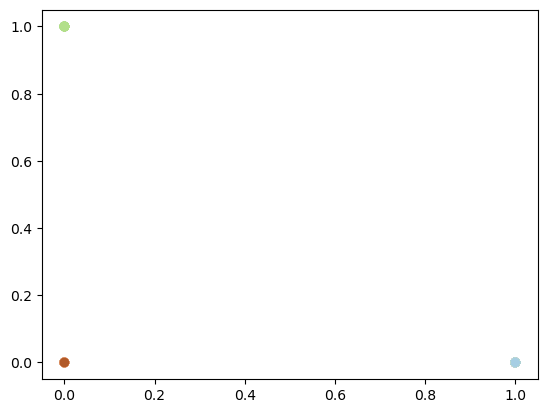

In [61]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap= plt.cm.Paired)   # plot scatterplot, c=Y means color of animal type at some point, cmap indicates entire range of available colors 

In [62]:
print(X[:,0].min())  # min value of x coordinate of a point
print(X[:,0].max())  # max value of x coordinate of a point

print(X[:,1].min())   # min value of y coordinate of a point
print(X[:,1].max())   # max value of y coordinate of a point

0
1
0
1


In [63]:
x_min,x_max = X[:,0].min()-0.1, X[:,0].max()+0.1  # min value of x coordinate with padding, max value of x coordinate with padding

y_min,y_max = X[:,1].min()-0.1, X[:,1].max()+0.1 # min value of y coordinate with padding, max value of y coordinate with padding 

padding is the space between border and data in a rectangle. Padding ensure that the data does not flush against the border of rectangle. Here, 0.1 is padding value 

In [64]:
print(x_min)
print(x_max)

print(y_min)
print(y_max)


-0.1
1.1
-0.1
1.1


create a meshgrid for decision boundary vizualization using meshgrid function (use to create rectangular boundary). Mesh is an arrangement of points used to vizualize the shape of any object.  

In [65]:
xx, yy = np.meshgrid(np.linspace(x_min,x_max,100), np.linspace(y_min,y_max,100)) #100 data points between x_min to x_max, 100 data points between y_min to y_max

In [66]:
xx

array([[-0.1       , -0.08787879, -0.07575758, ...,  1.07575758,
         1.08787879,  1.1       ],
       [-0.1       , -0.08787879, -0.07575758, ...,  1.07575758,
         1.08787879,  1.1       ],
       [-0.1       , -0.08787879, -0.07575758, ...,  1.07575758,
         1.08787879,  1.1       ],
       ...,
       [-0.1       , -0.08787879, -0.07575758, ...,  1.07575758,
         1.08787879,  1.1       ],
       [-0.1       , -0.08787879, -0.07575758, ...,  1.07575758,
         1.08787879,  1.1       ],
       [-0.1       , -0.08787879, -0.07575758, ...,  1.07575758,
         1.08787879,  1.1       ]])

In [67]:
yy 

array([[-0.1       , -0.1       , -0.1       , ..., -0.1       ,
        -0.1       , -0.1       ],
       [-0.08787879, -0.08787879, -0.08787879, ..., -0.08787879,
        -0.08787879, -0.08787879],
       [-0.07575758, -0.07575758, -0.07575758, ..., -0.07575758,
        -0.07575758, -0.07575758],
       ...,
       [ 1.07575758,  1.07575758,  1.07575758, ...,  1.07575758,
         1.07575758,  1.07575758],
       [ 1.08787879,  1.08787879,  1.08787879, ...,  1.08787879,
         1.08787879,  1.08787879],
       [ 1.1       ,  1.1       ,  1.1       , ...,  1.1       ,
         1.1       ,  1.1       ]])

In [68]:
print(xx.shape)
print(yy.shape)

(100, 100)
(100, 100)


In [69]:
print(xx.min())
print(xx.max())
print(yy.min())
print(yy.max())

-0.1
1.1
-0.1
1.1


xx and yy are 2D arrays => convert them into 1D using ravel() method 

In [70]:
xx.ravel()

array([-0.1       , -0.08787879, -0.07575758, ...,  1.07575758,
        1.08787879,  1.1       ])

In [71]:
yy.ravel()

array([-0.1, -0.1, -0.1, ...,  1.1,  1.1,  1.1])

In [72]:
x_in = np.c_[xx.ravel(),yy.ravel()] # concatenate elements of 1st row and 2nd row  from both the arrays 

In [73]:
x_in # create a mesh of points for contour plotting

array([[-0.1       , -0.1       ],
       [-0.08787879, -0.1       ],
       [-0.07575758, -0.1       ],
       ...,
       [ 1.07575758,  1.1       ],
       [ 1.08787879,  1.1       ],
       [ 1.1       ,  1.1       ]])

In [74]:
x_in.shape   # 20000 data points

(10000, 2)

# Now, use the trained model to evaluate the model on test set (x_in)  

In [75]:
X_test.shape

(21, 16)

In [76]:
x_in = x_in.reshape(1250,16)  # 1250x16 = 20000 data points (no of columns of x_in should be equal to no of columns of X_test )

In [77]:
x_in

array([[-0.1       , -0.1       , -0.08787879, ..., -0.1       ,
        -0.01515152, -0.1       ],
       [-0.0030303 , -0.1       ,  0.00909091, ..., -0.1       ,
         0.08181818, -0.1       ],
       [ 0.09393939, -0.1       ,  0.10606061, ..., -0.1       ,
         0.17878788, -0.1       ],
       ...,
       [ 0.82121212,  1.1       ,  0.83333333, ...,  1.1       ,
         0.90606061,  1.1       ],
       [ 0.91818182,  1.1       ,  0.93030303, ...,  1.1       ,
         1.0030303 ,  1.1       ],
       [ 1.01515152,  1.1       ,  1.02727273, ...,  1.1       ,
         1.1       ,  1.1       ]])

In [78]:
x_in.shape

(1250, 16)

In [79]:
Y_pred = model_KNN.predict(x_in) # predict the class of Y for a given testing data x_in for contour plotting

In [80]:
Y_pred

array([3, 3, 3, ..., 4, 4, 2], dtype=int64)

In [81]:
Y_pred.shape

(1250,)

In [82]:
Y_Pred1= np.pad(Y_pred, (0, 8750))  # add 8750 zeros at the end of array to get 10000 elements in Y_pred and save in Y_pred1

In [83]:
Y_Pred1

array([3, 3, 3, ..., 0, 0, 0], dtype=int64)

In [84]:
Y_Pred1.shape

(10000,)

In [85]:
Y_Pred1 = Y_Pred1.reshape(xx.shape)  #reshaping 

In [86]:
Y_Pred1

array([[3, 3, 3, ..., 2, 2, 2],
       [4, 3, 3, ..., 2, 2, 2],
       [4, 4, 3, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [87]:
Y_Pred1.shape

(100, 100)

now, we are ready to plot our decision boundary 

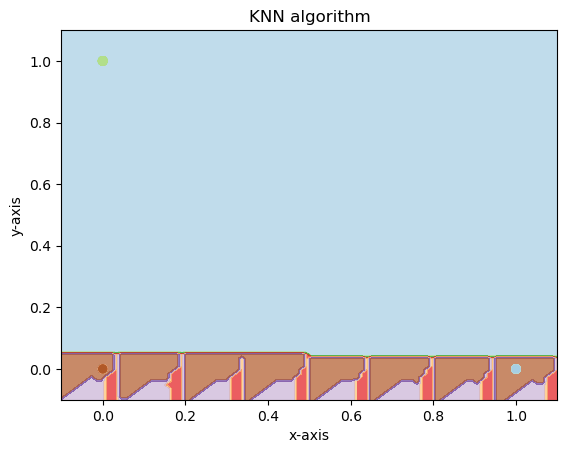

In [88]:
plt.contourf(xx, yy, Y_Pred1, cmap = plt.cm.Paired, alpha =0.7) # plot decision boundary of KNN
plt.scatter(X[:,0], X[:,1], c=Y, cmap = plt.cm.Paired) # scatter plot of samples
plt.title("KNN algorithm")
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()

we can see our model has performed quite average as we have just 3 data points  (decision boundary successfully separates the data points belonging to different classes)